In [1]:
from eval_utils import get_model, simpler_eval_batch, get_plot, get_pretty_plot2, get_baselines_1a, get_baselines_1bc

GPU = 2
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(GPU)

import numpy as np
import matplotlib.pyplot as plt

from eval_constants import *


In [2]:
finetuned_model_path = '/home/riadoshi/alignment/Alignment/models/finetune_256/efc1432a-bba7-4616-92ef-cc82f6543bd4'
finetuned_model = get_model(finetuned_model_path, n_embd=128, n_layer=6, n_head=4)

# base_model_path = "/home/riadoshi/alignment/Alignment/models/train_multiple/0206e01d-0100-47d8-8086-1495d6443a55/"   #"/home/riadoshi/alignment/prev/ckpts/ckpt/"
# base_model = get_model(base_model_path)

# base_model_path = '/home/riadoshi/alignment/Alignment/models/train_multiple/c3b57089-5466-4a2d-a9a7-d82eff45732a/'
# base_model = get_model(base_model_path)

# base_model_small_path = '/home/riadoshi/alignment/Alignment/models/train_multiple/5d3b26ff-427f-40a2-9e2e-14434bd9b277/'
# base_model_small = get_model(base_model_small_path, n_embd=128, n_layer=6, n_head=4)

# base_model_xs_path = '/home/riadoshi/alignment/Alignment/models/train_multiple/21af3c3f-c72c-4ab5-ad8b-9c5fc32208e9/'
# base_model_xs = get_model(base_model_xs_path, n_embd=64, n_layer=4, n_head=2)


# before_model_path ='/home/riadoshi/alignment/prev/ckpts/ckpt/'
# before_model = get_model(before_model_path, n_embd=512, n_layer=24, n_head=16)

done wl 2
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256


<AxesSubplot:title={'center':'Context Length vs Aligned Model on Degree 2 Clamped Polynomial Regression'}, xlabel='Context Length', ylabel='MSE'>

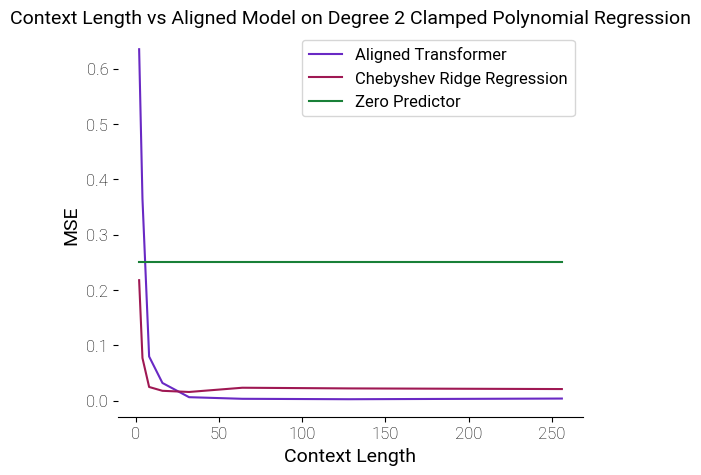

In [6]:
# evaluate base model on varying context length 
ld = hd = 2

window_lengths = [2**i for i in range(1, 9)]
num_per_wl = 1000

neg_mse, ridge_mse, zero_mse = [], [], []

# now do all the baselines for this threshold 
# zero predictor


for wl in window_lengths:
    mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
    for _ in range(num_per_wl):
        y, pred, ridge_pred = simpler_eval_batch(finetuned_model, 
                                     use_clamped_y=True, 
                                     last_pt_above_thresh=-1, 
                                     last_pt_use_clamped_y=-1,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
        squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
        mse_list.append(squared_error)  # Append the squared error to the list
        ridge_mse_list.append(ridge_squared_error)
        zero_mse_list.append(zero_error)

    neg_mse.append(-np.median(mse_list))  # Store the negative median MSE
    ridge_mse.append(-np.median(ridge_mse_list))
    zero_mse.append(-np.median(zero_mse_list))
    print("done wl", wl)

get_pretty_plot2(x_axes=[window_lengths, window_lengths, window_lengths],
            y_axes=[-np.array(neg_mse), -np.array(ridge_mse), -np.array(zero_mse)],
            title=f"Context Length vs Aligned Model on Degree {hd} Clamped Polynomial Regression",
            legend=['Aligned Transformer', 'Chebyshev Ridge Regression', 'Zero Predictor'],
            x_label="Context Length",
            y_label="MSE",
            normalize=False
         )

done wl 2
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256
done wl 2
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256


<AxesSubplot:title={'center':'Attacker vs Defender: How Easily Can an Aligned Model on Degree 8 Break Clamped Alignment?'}, xlabel='Context Length', ylabel='MSE'>

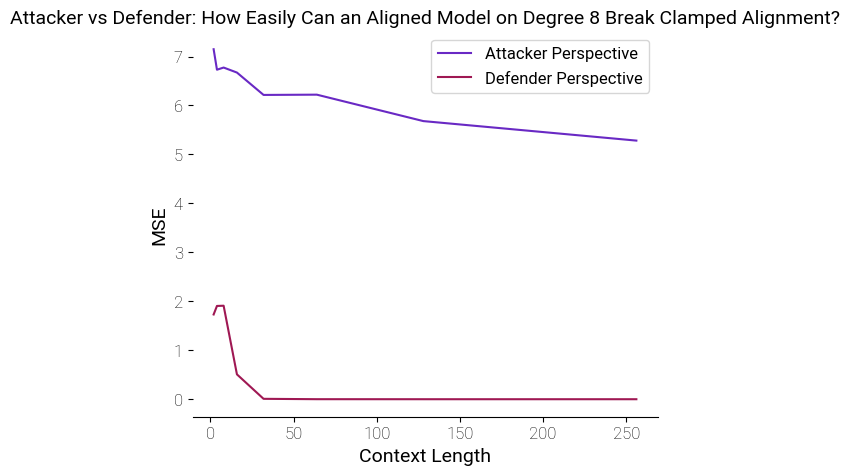

In [3]:
# evaluate base model on varying context length 
ld = hd = 4

window_lengths = [2**i for i in range(1, 9)]
num_per_wl = 1000

attacker_mse, defender_mse = [], []

# now do all the baselines for this threshold 
# zero predictor


for wl in window_lengths:
    mse_list = [] # List to store the squared errors for each iteration
    for _ in range(num_per_wl):
        y, pred, ridge_pred = simpler_eval_batch(finetuned_model, 
                                     use_clamped_y=False, 
                                     last_pt_above_thresh=True, 
                                     last_pt_use_clamped_y=False,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
        squared_error = (y.numpy() - pred.numpy())**2
        mse_list.append(squared_error)  # Append the squared error to the list

    attacker_mse.append(-np.median(mse_list))  # Store the negative median MSE
    print("done wl", wl)


for wl in window_lengths:
    mse_list = [] # List to store the squared errors for each iteration
    for _ in range(num_per_wl):
        y, pred, ridge_pred = simpler_eval_batch(finetuned_model, 
                                     use_clamped_y=False, 
                                     last_pt_above_thresh=True, 
                                     last_pt_use_clamped_y=True,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
        squared_error = (y.numpy() - pred.numpy())**2
        mse_list.append(squared_error)  # Append the squared error to the list

    defender_mse.append(-np.median(mse_list))  # Store the negative median MSE
    print("done wl", wl)

get_pretty_plot2(x_axes=[window_lengths, window_lengths],
            y_axes=[-np.array(attacker_mse), -np.array(defender_mse)],
            title=f"Attacker vs Defender: How Easily Can an Aligned Model on Degree {hd} Break Clamped Alignment?",
            legend=['Attacker Perspective', 'Defender Perspective'],
            x_label="Context Length",
            y_label="MSE",
            normalize=False
         )

done wl 2
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256


<AxesSubplot:title={'center':'Defender Perspective: How Easily Can an Aligned Model on Degree 8 Break Clamped Alignment?'}, xlabel='Context Length', ylabel='MSE'>

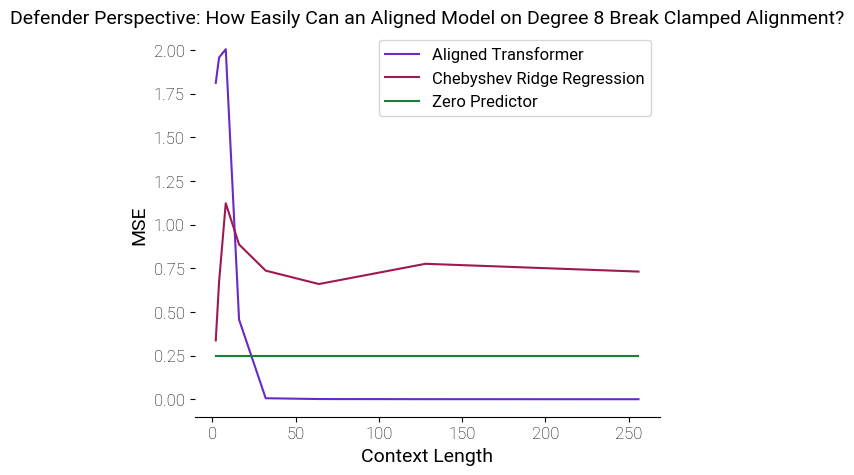

In [9]:
# evaluate base model on varying context length 
ld = hd = 8

window_lengths = [2**i for i in range(1, 9)]
num_per_wl = 2000

neg_mse, ridge_mse, zero_mse = [], [], []

# now do all the baselines for this threshold 
# zero predictor


for wl in window_lengths:
    mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
    for _ in range(num_per_wl):
        y, pred, ridge_pred = simpler_eval_batch(finetuned_model, 
                                     use_clamped_y=False, 
                                     last_pt_above_thresh=True, 
                                     last_pt_use_clamped_y=True,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
        squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
        mse_list.append(squared_error)  # Append the squared error to the list
        ridge_mse_list.append(ridge_squared_error)
        zero_mse_list.append(zero_error)

    neg_mse.append(-np.median(mse_list))  # Store the negative median MSE
    ridge_mse.append(-np.median(ridge_mse_list))
    zero_mse.append(-np.median(zero_mse_list))
    print("done wl", wl)

get_pretty_plot2(x_axes=[window_lengths, window_lengths, window_lengths],
            y_axes=[-np.array(neg_mse), -np.array(ridge_mse), -np.array(zero_mse)],
            title=f"Defender Perspective: How Easily Can an Aligned Model on Degree {hd} Break Clamped Alignment?",
            legend=['Aligned Transformer', 'Chebyshev Ridge Regression', 'Zero Predictor'],
            x_label="Context Length",
            y_label="MSE",
            normalize=False
         )

done wl 2
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256


<AxesSubplot:title={'center':'In-Context Clamping Alignment on Degree 8 Polynomial Regression'}, xlabel='Context Length', ylabel='MSE'>

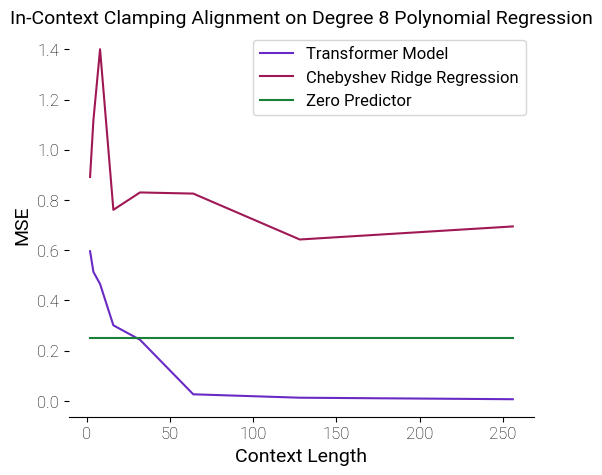

In [27]:
# evaluate base model on varying context length 
ld = hd = 8

window_lengths = [2**i for i in range(1, 9)]
num_per_wl = 1000

neg_mse, ridge_mse, zero_mse = [], [], []

# now do all the baselines for this threshold 
# zero predictor


for wl in window_lengths:
    mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
    for _ in range(num_per_wl):
        y, pred, ridge_pred = simpler_eval_batch(base_model, 
                                     use_clamped_y=True, 
                                     last_pt_above_thresh=-1, 
                                     last_pt_use_clamped_y=-1,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
        squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
        mse_list.append(squared_error)  # Append the squared error to the list
        ridge_mse_list.append(ridge_squared_error)
        zero_mse_list.append(zero_error)

    neg_mse.append(-np.median(mse_list))  # Store the negative median MSE
    ridge_mse.append(-np.median(ridge_mse_list))
    zero_mse.append(-np.median(zero_mse_list))
    print("done wl", wl)

get_pretty_plot2(x_axes=[window_lengths, window_lengths, window_lengths],
            y_axes=[-np.array(neg_mse), -np.array(ridge_mse), -np.array(zero_mse)],
            title=f"In-Context Clamping Alignment on Degree {hd} Polynomial Regression",
            legend=['Transformer Model', 'Chebyshev Ridge Regression', 'Zero Predictor'],
            x_label="Context Length",
            y_label="MSE",
            normalize=False
         )

In [ ]:
# # evaluate base model on varying context length 
# ld = hd = 4

# # IN-CONTEXT ALIGNMENT CONFIG
# window_lengths = [2**i for i in range(2, 9)]
# num_per_wl = 1000
# use_clamped_y=True

# above_negmse = []
# above_ridge_negmse = []
# above_zero_negmse = []


# for wl in window_lengths:
#     mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
#     for _ in range(num_per_wl):
#         y, pred, ridge_pred = simpler_eval_batch(base_model, 
#                             use_clamped_y=use_clamped_y, 
#                             last_pt_above_thresh=True, 
#                             last_pt_use_clamped_y=True,
#                             lowest_degree=ld,
#                             highest_degree=hd,
#                             window_len=wl)
#         squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
#         mse_list.append(squared_error)  # Append the squared error to the list
#         ridge_mse_list.append(ridge_squared_error)
#         zero_mse_list.append(zero_error)
        
#     print("done wl", wl)
    
#     above_negmse.append(-np.median(mse_list))  # Store the negative median MSE
#     above_ridge_negmse.append(-np.median(ridge_mse_list))
#     above_zero_negmse.append(-np.median(zero_mse_list))


# below_negmse = []
# below_ridge_negmse = []
# below_zero_negmse = []


# for wl in window_lengths:
#     mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
#     for _ in range(num_per_wl):
#         y, pred, ridge_pred = simpler_eval_batch(base_model, 
#                             use_clamped_y=use_clamped_y, 
#                             last_pt_above_thresh=False, 
#                             last_pt_use_clamped_y=False,
#                             lowest_degree=ld,
#                             highest_degree=hd,
#                             window_len=wl)
#         squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
#         mse_list.append(squared_error)  # Append the squared error to the list
#         ridge_mse_list.append(ridge_squared_error)
#         zero_mse_list.append(zero_error)
        
#     print("done wl", wl)
    
#     below_negmse.append(-np.median(mse_list))  # Store the negative median MSE
#     below_ridge_negmse.append(-np.median(ridge_mse_list))
#     below_zero_negmse.append(-np.median(zero_mse_list))

# y_axes = [above_negmse, above_ridge_negmse, below_negmse, below_ridge_negmse]
# legends = ['Transformer: Last Pt Above Threshold','Chebyshev Ridge: Last Pt Above Threshold', 'Transformer: Last Pt Below Threshold', 'Chebyshev Ridge: Last Pt Below Threshold']

# get_pretty_plot2(x_axes=[window_lengths, window_lengths, window_lengths, window_lengths],
#             y_axes=y_axes,
#             title=f"Effect of Context Length on In-Context Degree {hd} Polynomial Clamping Alignment",
#             legend=legends,
#             x_label="Context Length",
#             y_label="Negative MSE",
#             normalize=False
#          )

done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256


<AxesSubplot:title={'center':'Effect of Model Size on In-Context Alignment for Degree 8 Polynomial'}, xlabel='Context Length', ylabel='MSE'>

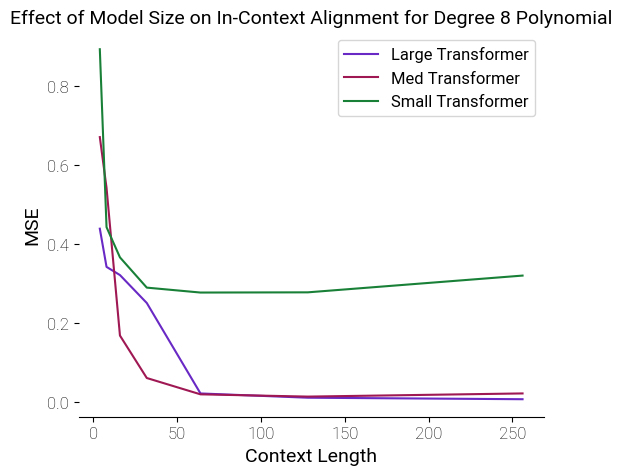

In [23]:
# how does model size affect in context alignment: 
ld = hd = 8
window_lengths = [2**i for i in range(2, 9)]
num_per_wl = 1000

neg_mse = {'med': [], 'small': [], 'xs': []}
ridge_mse = []
zero_mse = []

for model_size in neg_mse.keys():
    model = {'med': base_model, 'small': base_model_small, 'xs': base_model_xs}[model_size]
    # for wl in window_lengths:
    #     wl_mse = 0
    #     for _ in range(num_per_wl):
    #         y, pred = simpler_eval_batch(model, 
    #                             use_clamped_y=True, 
    #                             last_pt_above_thresh=-1, 
    #                             last_pt_use_clamped_y=-1, # if the last point is above the threshold, then clamp it
    #                             window_len=wl)
    #         wl_mse+= np.sqrt((pred.numpy()-y.numpy())**2)
    #     neg_mse[model_size].append(-wl_mse/num_per_wl)
    #     print("done wl", wl)

    for wl in window_lengths:
        mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
        for _ in range(num_per_wl):
            y, pred, ridge_pred = simpler_eval_batch(model, 
                                     use_clamped_y=True, 
                                     last_pt_above_thresh=-1, 
                                     last_pt_use_clamped_y=-1,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
            squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
            mse_list.append(squared_error)  # Append the squared error to the list
            ridge_mse_list.append(ridge_squared_error)
            zero_mse_list.append(zero_error)

        neg_mse[model_size].append(-np.median(mse_list))  # Store the negative median MSE
        print("done wl", wl)

        if model_size == 'xs':
            ridge_mse.append(-np.median(ridge_mse_list))
            zero_mse.append(-np.median(zero_mse_list))

x_axes = [window_lengths] *3
y_axes = [-np.array(neg_mse['med']), -np.array(neg_mse['small']), -np.array(neg_mse['xs'])] # , ridge_mse, zero_mse]
legends = ['Large Transformer', 'Med Transformer', 'Small Transformer'] #, 'Chebyshev Ridge', 'Zero Predictor']

get_pretty_plot2(x_axes=[window_lengths]*3,
            y_axes=y_axes,
            title=f"Effect of Model Size on In-Context Alignment for Degree {hd} Polynomial",
            legend=legends,
            x_label="Context Length",
            y_label="MSE",
            normalize=False
         )

In [ ]:
# how does model size affect in context alignment: 
ld = hd = 8
window_lengths = [2**i for i in range(2, 9)]
num_per_wl = 1000

neg_mse = {'med': [], 'small': [], 'xs': []}
ridge_mse = []
zero_mse = []

for model_size in neg_mse.keys():
    model = {'med': base_model, 'small': base_model_small, 'xs': base_model_xs}[model_size]
    # for wl in window_lengths:
    #     wl_mse = 0
    #     for _ in range(num_per_wl):
    #         y, pred = simpler_eval_batch(model, 
    #                             use_clamped_y=True, 
    #                             last_pt_above_thresh=-1, 
    #                             last_pt_use_clamped_y=-1, # if the last point is above the threshold, then clamp it
    #                             window_len=wl)
    #         wl_mse+= np.sqrt((pred.numpy()-y.numpy())**2)
    #     neg_mse[model_size].append(-wl_mse/num_per_wl)
    #     print("done wl", wl)

    for wl in window_lengths:
        mse_list, ridge_mse_list, zero_mse_list = [], [], [] # List to store the squared errors for each iteration
        for _ in range(num_per_wl):
            y, pred, ridge_pred = simpler_eval_batch(model, 
                                     use_clamped_y=True, 
                                     last_pt_above_thresh=-1, 
                                     last_pt_use_clamped_y=-1,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
            squared_error, ridge_squared_error, zero_error = (y.numpy() - pred.numpy())**2, (y.numpy() - ridge_pred.numpy())**2, y.numpy()**2
            mse_list.append(squared_error)  # Append the squared error to the list
            ridge_mse_list.append(ridge_squared_error)
            zero_mse_list.append(zero_error)

        neg_mse[model_size].append(-np.median(mse_list))  # Store the negative median MSE
        print("done wl", wl)

        if model_size == 'xs':
            ridge_mse.append(-np.median(ridge_mse_list))
            zero_mse.append(-np.median(zero_mse_list))

x_axes = [window_lengths] *3
y_axes = [neg_mse['med'], neg_mse['small'], neg_mse['xs']] # , ridge_mse, zero_mse]
legends = ['Large Transformer', 'Med Transformer', 'Small Transformer'] #, 'Chebyshev Ridge', 'Zero Predictor']

get_pretty_plot2(x_axes=[window_lengths]*3,
            y_axes=y_axes,
            title=f"Effect of Model Size on In-Context Alignment for Degree {hd} Polynomial",
            legend=legends,
            x_label="Context Length",
            y_label="Negative MSE",
            normalize=False
         )

<AxesSubplot:title={'center':'Effect of Model Size on In-Context Alignment for Degree 2 Polynomial'}, xlabel='Context Length', ylabel='Negative MSE'>

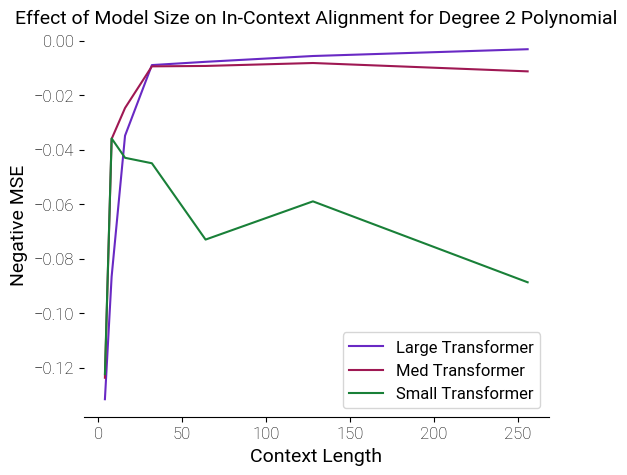

In [10]:
get_pretty_plot2(x_axes=[window_lengths]*3,
            y_axes=y_axes,
            title=f"Effect of Model Size on In-Context Alignment for Degree {hd} Polynomial",
            legend=legends,
            x_label="Context Length",
            y_label="Negative MSE",
            normalize=False
         )

done wl 2
done wl 4
done wl 8
done wl 16
done wl 32
done wl 64
done wl 128
done wl 256


<AxesSubplot:title={'center':'Effect of Context Length on In-Context Learning of Various Tasks'}, xlabel='Context Length', ylabel='Normalized Performance'>

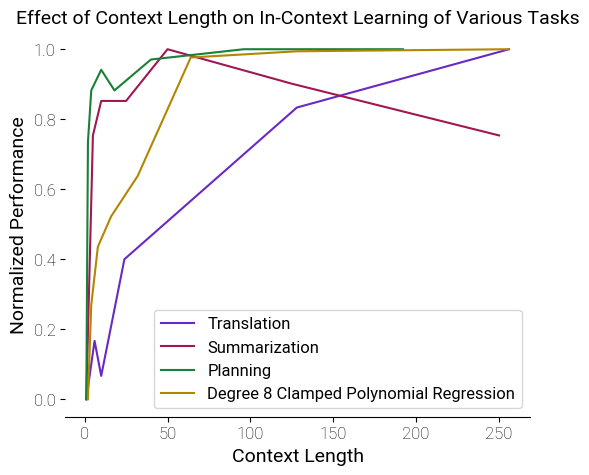

In [13]:
# evaluate base model on varying context length 
# evaluate base model on varying context length 
ld = hd = 8

window_lengths = [2**i for i in range(1, 9)]
num_per_wl = 1000

neg_mse = [] 

# now do all the baselines for this threshold 
# zero predictor


for wl in window_lengths:
    mse_list = [] # List to store the squared errors for each iteration
    for _ in range(num_per_wl):
        y, pred, _ = simpler_eval_batch(base_model, 
                                     use_clamped_y=True, 
                                     last_pt_above_thresh=-1, 
                                     last_pt_use_clamped_y=-1,
                                     lowest_degree=ld,
                                     highest_degree=hd,
                                     window_len=wl)
        squared_error = (y.numpy() - pred.numpy())**2
        mse_list.append(squared_error)  # Append the squared error to the list

    neg_mse.append(-np.median(mse_list))  # Store the negative median MSE
    print("done wl", wl)


# log base 2 of window lengths using numpy
baselines = get_baselines_1a()
x_axes, y_axes, legends = baselines['x'] + [window_lengths], baselines['y'] + [neg_mse], baselines['legends'] + ['Degree 8 Clamped Polynomial Regression']

get_pretty_plot2(x_axes=x_axes,
            y_axes=y_axes,
            title="Effect of Context Length on In-Context Learning of Various Tasks",
            legend=legends,
            x_label="Context Length",
            y_label="Normalized Performance",
            normalize=True,
         )

In [ ]:
# percent_clamped = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
window_lengths = [2**i for i in range(3, 9)]
num_per_wl = 1000

neg_mse = []

for wl in window_lengths:
    wl_mse = 0
    for _ in range(num_per_wl):
        y, pred = simpler_eval_batch(base_model, 
                             use_clamped_y=True, 
                             last_pt_above_thresh=-1,
                             last_pt_use_clamped_y=-1, # if the last point is above the threshold, then clamp it
                             window_len=wl)
        wl_mse+= np.sqrt((pred.numpy()-y.numpy())**2)
        
    neg_mse.append(-wl_mse/num_per_wl)

baselines = get_baselines_1a()
x_axes, y_axes, legends = baselines['x'] + [window_lengths], baselines['y'] + [neg_mse], baselines['legends'] + ['Polynomial Regression']

get_pretty_plot2(x_axes=x_axes,
            y_axes=y_axes,
            title="Effect of Context Length on In-Context Alignment",
            legend=legends,
            x_label="Context Length",
            y_label="Normalized Success",
            normalize=True
         )

In [ ]:
plt = get_plot(x_axis=percent_clamped,
            y_axis=[-m for m in mse],
            title="Effect of % Clamped Examples on Base Model Performance",
            x_label="% Clamped Examples",
            y_label="Negative MSE",
         )
# plot horizontal line at -0.45
plt.axhline(y=-0.45, color='r', linestyle='-')

# add legend ; red line = "Base Model with Unclamped Examples", blue line = "Base Model with Clamped Examples"
plt.legend(["Clamped Examples, Base Model", "Unclamped Examples, Base Model"])

In [ ]:
percent_clamped = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_per_pc = 100
random_last_pt = lambda : True if np.random.rand() > 0.75 else False

mse = []

for pc in percent_clamped:
    pc_mse = 0
    for _ in range(num_per_pc):
        y, pred = eval_batch(base_model, 
                             percent_above_thresh=pc, 
                             use_clamped_y=True, 
                             last_pt_above_thresh=True, 
                             last_pt_use_clamped_y=True)
        print((y, pred))
        pc_mse+= np.sqrt((pred-y)**2)
        
    mse.append(pc_mse/num_per_pc)

In [ ]:
# fmse_all = mse
plt = get_plot(x_axis=percent_clamped,
            y_axis=[-m for m in mse],
            title="How Well Does Base Model Learn Clamping? Clamped Examples Only",
            x_label="% Clamped Examples",
            y_label="Negative MSE",
         )
#additionally plot fmse_clamped
plt.plot(percent_clamped, [-m for m in fmse_clamped], color='r')
# add legend ; red line = "Base Model with Unclamped Examples", blue line = "Base Model with Clamped Examples"
plt.legend(["Clamped Examples, Base Model", "Clamped Examples, Finetuned Model"])


# plot horizontal line at -0.45
# plt.axhline(y=-0.45, color='r', linestyle='-')

# add legend ; red line = "Base Model with Unclamped Examples", blue line = "Base Model with Clamped Examples"
# should overlay finetuned model on clamped examples here too
# plt.legend(["Clamped Examples, Base Model", "Unclamped Examples, Base Model"])

In [ ]:
percent_clamped = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_per_pc = 100
random_last_pt = lambda : True if np.random.rand() > 0.75 else False

mse = []

for pc in percent_clamped:
    pc_mse = 0
    for _ in range(num_per_pc):
        y, pred = eval_batch(fintuned_model, 
                             percent_above_thresh=pc, 
                             use_clamped_y=True, 
                             last_pt_above_thresh=True, 
                             last_pt_use_clamped_y=True)
        print((y, pred))
        pc_mse+= np.sqrt((pred-y)**2)
        

    mse.append(pc_mse/num_per_pc)

In [ ]:
# fmse_clamped = mse
plt = get_plot(x_axis=percent_clamped,
            y_axis=[-m for m in mse],
            title="How Well Does Finetuned Model Learn Clamping? Evaluated on Clamped Examples Only",
            x_label="% Clamped Examples",
            y_label="Negative MSE",
         )

In [ ]:
last_pt_clamped=True
percent_clamped = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_per_pc = 500
mse = []

for pc in percent_clamped:
    pc_mse = 0
    for _ in range(num_per_pc):
        y, pred = eval_batch(model, percent_clamped_correct=pc, last_pt_clamped=last_pt_clamped)
        pc_mse+= np.sqrt((pred-y)**2)
        
    mse.append(pc_mse/num_per_pc)
    

In [ ]:
import matplotlib.pyplot as plt
# give plot x axis title
plt.xlabel('% Context Clamped')
plt.ylabel('MSE (averaged across 500 points)')
plt.title('MSE vs % Context Clamped')
# add a note on the graph
plt.text(0.5, 0.5, 'Last point SHOULD be clamped')
plt.plot(percent_clamped, mse)

In [ ]:
# how do original, non-clamped points do when the context has clamped points? 
last_pt_clamped=False
percent_clamped = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_per_pc = 500
fmse = []

for pc in percent_clamped:
    pc_mse = 0
    for _ in range(num_per_pc):
        y, pred = eval_batch(model, percent_clamped_correct=pc, last_pt_clamped=last_pt_clamped)
        pc_mse+= np.sqrt((pred-y)**2)
        
    fmse.append(pc_mse/num_per_pc)
    

In [ ]:
import matplotlib.pyplot as plt
# give plot x axis title
plt.xlabel('% Context Clamped')
plt.ylabel('MSE (averaged across 500 points)')
plt.title('MSE vs % Context Clamped')
# add a note on the graph
plt.text(0.5, 0.5, 'Last point should NOT be clamped')
plt.plot(percent_clamped, fmse)

In [ ]:
# sanity check original behavior: 
# how do original, non-clamped points do when the context has clamped points? 
# last_pt_clamped=False
# num_per_pc = 50
# sanity_mse = 0

# for _ in range(num_per_pc):
#     pc = 0.05 + np.random.rand() * 0.9
#     y, pred = eval_batch(model, percent_above_thresh=pc, use_clamped_y=False, last_pt_clamped=last_pt_clamped)
#     print((y, pred, np.sqrt((pred-y)**2)))
#     sanity_mse+= np.sqrt((pred-y)**2)
    
# sanity_mse /= num_per_pc
    

In [ ]:
# print(sanity_mse)